In [ ]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 13.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('drive/MyDrive/County/facebookNJgroupsbycountyconcat.csv')
df.head()

,Unnamed: 0,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,...,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Sponsor Category,Total Interactions (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),Overperforming Score,county,Group Name
0,0,NorEasterNick,NorEasterNick,100044183961739,NEWS_PERSONALITY,US,President & Chief Forecaster NorCast Media Gro...,2011-05-26 01:24:39,85012.0,103743.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"1,168",2.26,Atlantic,NaN
1,1,NorEasterNick,NorEasterNick,100044183961739,NEWS_PERSONALITY,US,President & Chief Forecaster NorCast Media Gro...,2011-05-26 01:24:39,62285.0,67329.0,...,NaN,NaN,NaN,1.555831e+11,Harrison House Diner,DINER,559,4.33,Atlantic,NaN
2,2,NorEasterNick,NorEasterNick,100044183961739,NEWS_PERSONALITY,US,President & Chief Forecaster NorCast Media Gro...,2011-05-26 01:24:39,82550.0,101458.0,...,NaN,Photos from NorEasterNick's post,NaN,NaN,NaN,NaN,429,3.33,Atlantic,NaN
3,3,NorEasterNick,NorEasterNick,100044183961739,NEWS_PERSONALITY,US,President & Chief Forecaster NorCast Media Gro...,2011-05-26 01:24:39,56652.0,60905.0,...,NaN,Monday Late Morning Storm Update 2-1-21,NaN,NaN,NaN,NaN,295,1.06,Atlantic,NaN
4,4,NorEasterNick,NorEasterNick,100044183961739,NEWS_PERSONALITY,US,President & Chief Forecaster NorCast Media Gro...,2011-05-26 01:24:39,86554.0,105180.0,...,NaN,NaN,NaN,1.872518e+15,Yes She Can Professional Bra Fitting,LINGERIE_UNDERWEAR_STORE,195,1.51,Atlantic,NaN


In [ ]:
df.columns

Index(['Unnamed: 0', 'Page Name', 'User Name', 'Facebook Id', 'Page Category',
       'Page Admin Top Country', 'Page Description', 'Page Created',
       'Likes at Posting', 'Followers at Posting', 'Post Created',
       'Post Created Date', 'Post Created Time', 'Type', 'Total Interactions',
       'Likes', 'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry',
       'Care', 'Video Share Status', 'Is Video Owner?', 'Post Views',
       'Total Views', 'Total Views For All Crossposts', 'Video Length', 'URL',
       'Message', 'Link', 'Final Link', 'Image Text', 'Link Text',
       'Description', 'Sponsor Id', 'Sponsor Name', 'Sponsor Category',
       'Total Interactions (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )',
       'Overperforming Score', 'county', 'Group Name'],
      dtype='object')

In [ ]:
import pandas as pd
from bertopic import BERTopic

In [ ]:
docs = df.Message.values

# %%
import csv
from hdbscan import HDBSCAN
from bertopic import BERTopic
import gensim.corpora as corpora
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models.coherencemodel import CoherenceModel

vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")

coherence_df = pd.DataFrame(columns=['min_cluster_size','coherence_score','num_of_topics'])

dir='drive/MyDrive/long_covid_bertopic/'

def compute_coherence_values(start=15,step=10,limit=205, coherence_df = coherence_df):

    coherence_values = []
    model_topic_list = []
    model_probls_list = []
    num_of_topics_list = []

    keys = ['min_cluster','coherence','num_of_topics']
    top_n = 15

    #setup the LDA model
    #it is multicore so we can run multiple models together
    for num_clusters in range(start, limit, step):
        hdbscan_model = HDBSCAN(min_cluster_size=num_clusters, metric='euclidean',cluster_selection_method='eom', prediction_data=True)
        topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True, hdbscan_model=hdbscan_model, vectorizer_model=vectorizer_model,top_n_words =top_n)
        topics, probs = topic_model.fit_transform(docs)
        print('saving the bertopic model...')


        Filename = dir+ "bertopic_"+str(num_clusters)+".model"
        topic_model.save(Filename)
        model_topic_list.append(topics)
        model_probls_list.append(pd.DataFrame(probs))
        scores = pd.DataFrame(probs)
        print('done with model ',str(num_clusters))

        # Preprocess Documents
        documents = pd.DataFrame({"Document": docs,
                              "ID": range(len(docs)),
                              "Topic": topics})
        documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
        cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

        # Extract vectorizer and analyzer from BERTopic
        vectorizer = topic_model.vectorizer_model
        analyzer = vectorizer.build_analyzer()

        # Extract features for Topic Coherence evaluation
        words = vectorizer.get_feature_names_out()
        tokens = [analyzer(doc) for doc in cleaned_docs]
        dictionary = corpora.Dictionary(tokens)
        corpus = [dictionary.doc2bow(token) for token in tokens]
        topic_words = [[words for words, _ in topic_model.get_topic(topic)]
                   for topic in range(len(set(topics))-1)]

        # Evaluate
        coherence_model = CoherenceModel(topics=topic_words,
                                     texts=tokens,
                                     corpus=corpus,
                                     dictionary=dictionary,
                                     coherence='c_v')
        coherence = coherence_model.get_coherence()

        #coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='u_mass')
        print('coherence metric is ',str(coherence))
        coherence_values.append(coherence)

        #write the next row of coherence scores/topic count/number of clusters
        coherence_df.to_csv('coherence_updates.csv')

        #adding # of topics
        num_of_topics = len(topic_model.get_topic_info())

        #adding new values to the pandas dataframe keeping track of the results
        values = [num_clusters,coherence,num_of_topics]
        coherence_df.loc[len(coherence_df.index)] = values

        #creating a dataframe with the topic numbers and their 10-word description
        topic_description = pd.DataFrame(columns=['topic_name','key_words'])

        for i in range(0, num_of_topics):
            topic_description.loc[i, 'topic_name'] = i
            topic_description.loc[i, 'key_words'] = topic_model.get_topic(i)

        #turing topic_description into a csv file
        topic_description.to_csv('topic_description_model_' + str(num_clusters) + '.csv')

        #flattening the words the topic description (without the weights)
        topic_words = []


        for i in range(0,len(topic_model.get_topic_freq())):
            topic_words.append(topic_model.get_topic(i))


        list_topic_words_flattened =  []

        for i in range(0,len(topic_words)-1):
            topic_words_flattened = []
            for j in range(0,top_n):
                topic_words_flattened.append(topic_words[i][j][0])

            list_topic_words_flattened.append(topic_words_flattened)


        topic_name = []
        for i in range(0,len(list_topic_words_flattened)):
            topic_name.append('Topic_'+str(i))

        topic_names_df = pd.DataFrame()

        topic_names_df['Topic'] = topic_name
        topic_names_df['Topic Words'] = list_topic_words_flattened


        topic_names_df.to_csv('topics_and_topic_key_terms_flattened'+ str(num_clusters) +'.csv')


    return  coherence_values,model_topic_list,model_probls_list


# %%
coherence_values, model_topic_list, model_probls_list = compute_coherence_values(start=10,step=5,limit=15)


In [ ]:
import matplotlib.pyplot as plt

counties = df['county']
text_data = df['Message']


In [ ]:
text_data.head()

0    WE ARE IN THIS FOR THE LONG HAUL For those of ...
1    7.8 8:30 JUST A QUICK UPDATE ON THE FACTS I kn...
2    A SNEAK PEEK... This Is generally what my 24/7...
3    THE STORM IS NOWHERE NEAR DONE! There will lik...
4    12.16 10AM IN IT FOR THE LONG HAUL I think we ...
Name: Message, dtype: object

In [ ]:
topic_model = BERTopic.load('drive/MyDrive/long_covid_bertopic/bertopic_10.model')

topics, _ = topic_model.fit_transform(text_data)


Batches:   0%|          | 0/78 [00:00<?, ?it/s]

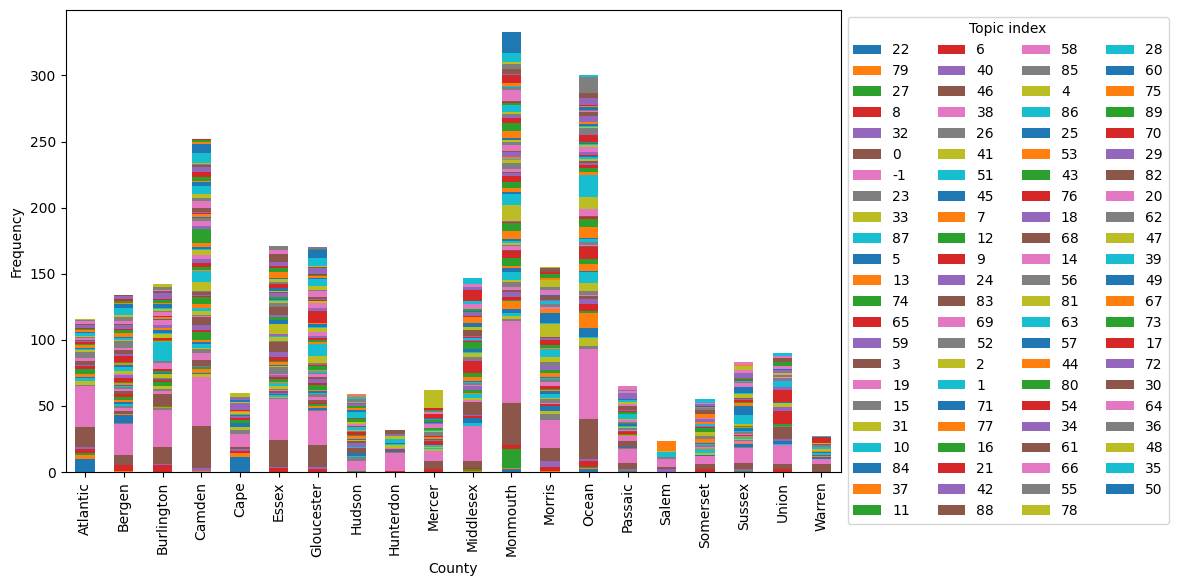

In [ ]:
topics_df = pd.DataFrame({'topic': topics, 'county': counties})

unique_topics = topics_df['topic'].unique()
unique_counties = topics_df['county'].unique()

# df to hold topic data
topic_freq_df = pd.DataFrame(index=unique_counties, columns=unique_topics)

# calculate topic frequencies
for county in unique_counties:
    county_topics = topics_df[topics_df['county'] == county]['topic']
    topic_freqs = county_topics.value_counts()
    topic_freq_df.loc[county, topic_freqs.index] = topic_freqs

topic_freq_df.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.legend(title='Topic index', ncol=4, bbox_to_anchor=(1,1))

plt.xlabel('County')
plt.ylabel('Frequency')

plt.show()

In [ ]:
for topic_id in unique_topics:
    keywords_with_scores = topic_model.get_topic(topic_id)
    keywords = [keyword for keyword, _ in keywords_with_scores]
    print(f"Topic {topic_id}: {', '.join(keywords)}")

Topic 22: rain, storm, case, weather, flooding, public adjusting, yeager, yeager public, adjusting, tornado, winds, concern, sustained, saying, gusts
Topic 79: forecasts, wall, weather, app, absolutely, roads, news12nj updates, nope heavy, onair app, plans soak, morning live, roads ends, miserable actually, dont youll, saw bit
Topic 27: dove, chime, prince, canei, school crush, choice make, cj, werent, deals, cinnamon, things, crush, secret, high school, relationship
Topic 8: johnson, johnson johnson, booster, johnson shot, day, king, halloween, got, chocolate, bingo, orange, holiday, rock, people, holiday season
Topic 32: ford, 46 years, haul 46, truck leader, engine ready, years ford, job thank, thank owners, trucks getting, getting job, ford trucks, making truck, owners making, rev engine, 46
Topic 0: covid19, covid, children, bud, lou, people, risk, vaccines, vaccinated, vaccination, symptoms, health, long, vaccine, long covid
Topic -1: long, new, cleaning, haul, pickleball, carpet